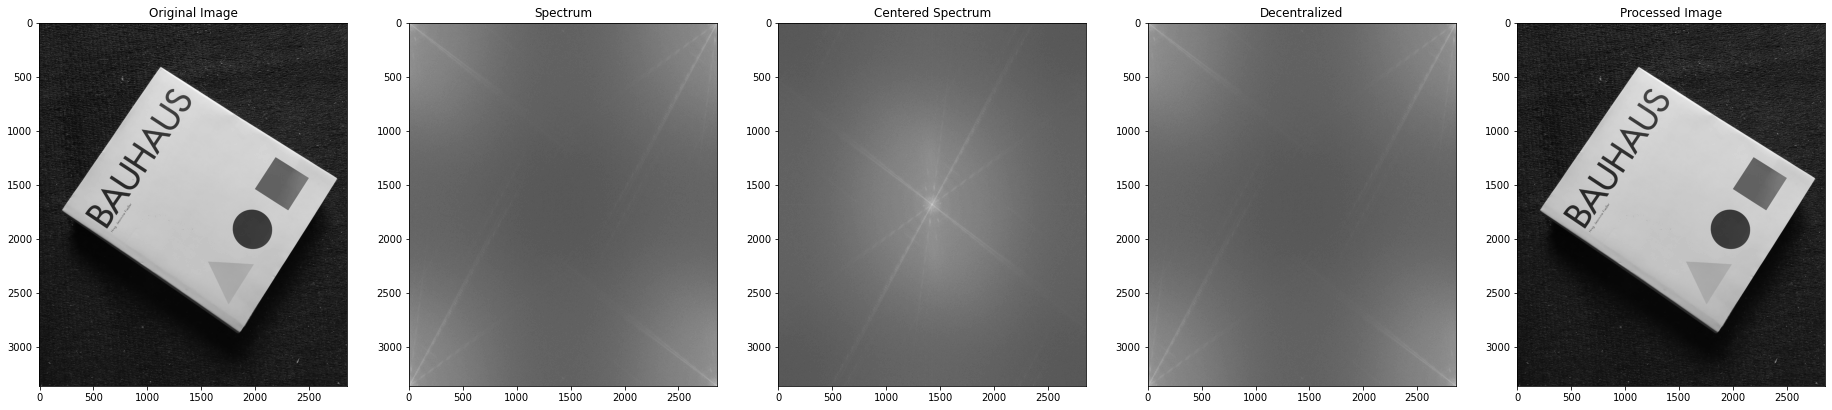

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c1 = cv2.imread("drive/My Drive/Pictures/bauhaus.jpg", 0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

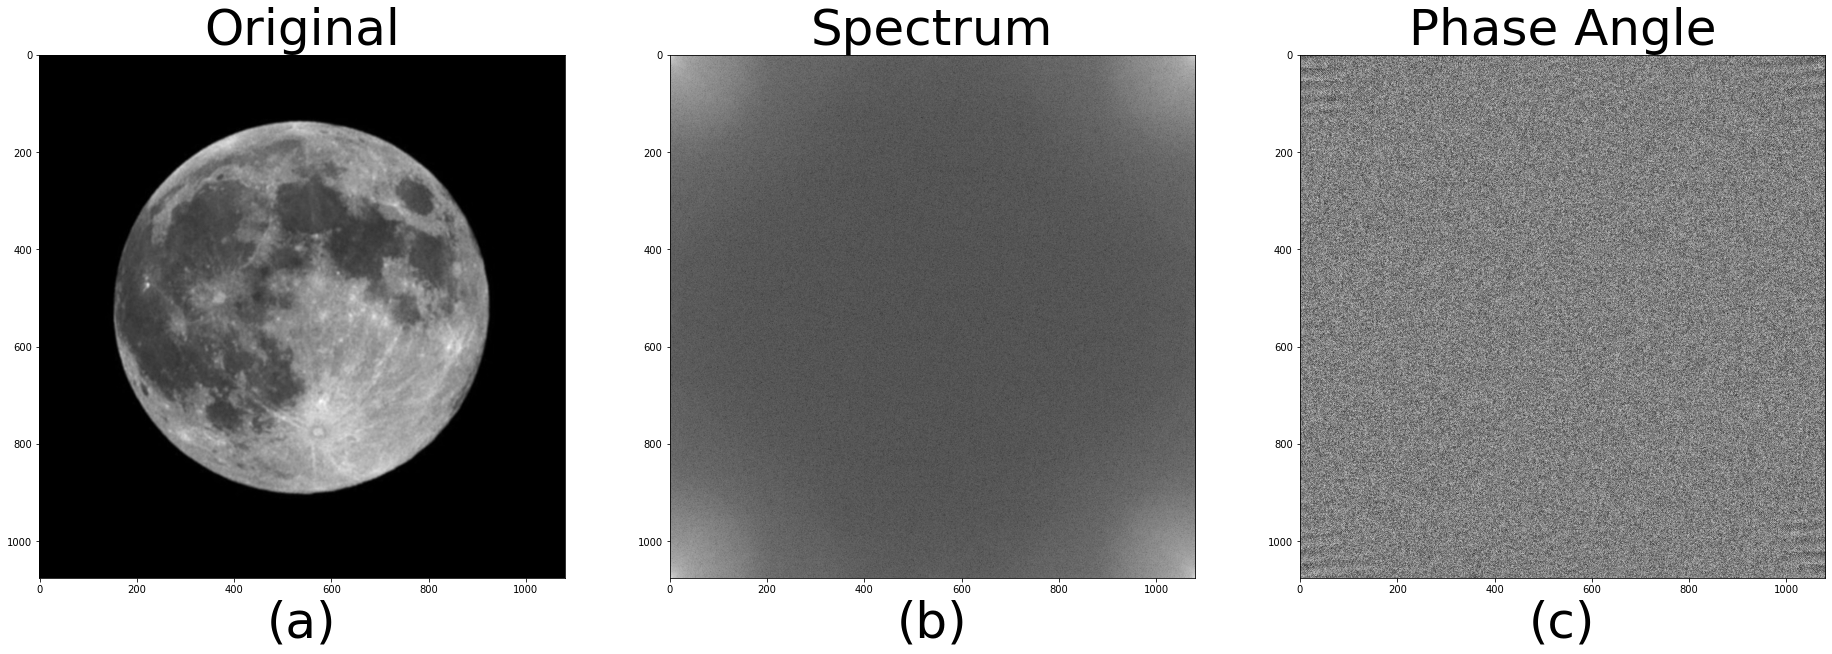

In [0]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("drive/My Drive/Pictures/Mond.jpg", 0)
size = 50

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original", fontsize=size), plt.xlabel("(a)", fontsize=size)

original = np.fft.fft2(img)
plt.subplot(132), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum", fontsize=size), plt.xlabel("(b)", fontsize=size)

plt.subplot(133), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle", fontsize=size), plt.xlabel("(c)", fontsize=size)

plt.savefig("drive/My Drive/Pictures/magnitude_phase.jpg")

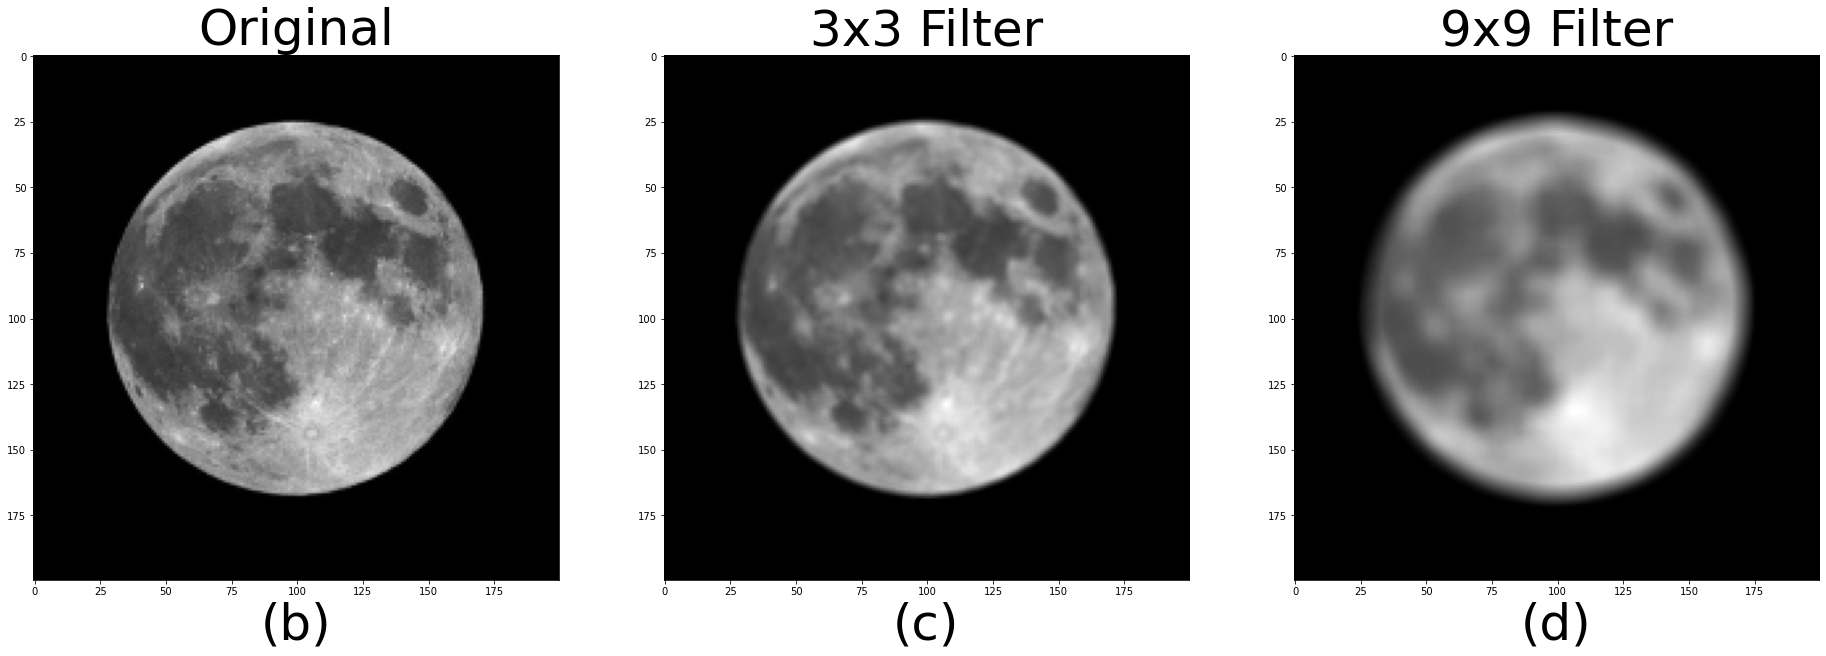

In [41]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("drive/My Drive/Pictures/Mond.jpg", 0)
img = cv2.resize(img, (200,200))
size = 50

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original", fontsize=size), plt.xlabel("(b)", fontsize=size)

kernel = np.ones((3,3),np.float32)/(9)
mean_filterd = cv2.filter2D(img, -1, kernel)
plt.subplot(132), plt.imshow(mean_filterd, "gray"), plt.title("3x3 Filter", fontsize=size), plt.xlabel("(c)", fontsize=size)

kernel = np.ones((9,9),np.float32)/(81)
mean_filterd = cv2.filter2D(img, -1, kernel)
plt.subplot(133), plt.imshow(mean_filterd, "gray"), plt.title("9x9 Filter", fontsize=size), plt.xlabel("(d)", fontsize=size)
plt.savefig("drive/My Drive/Pictures/mean_filter.jpg")

159
159 0


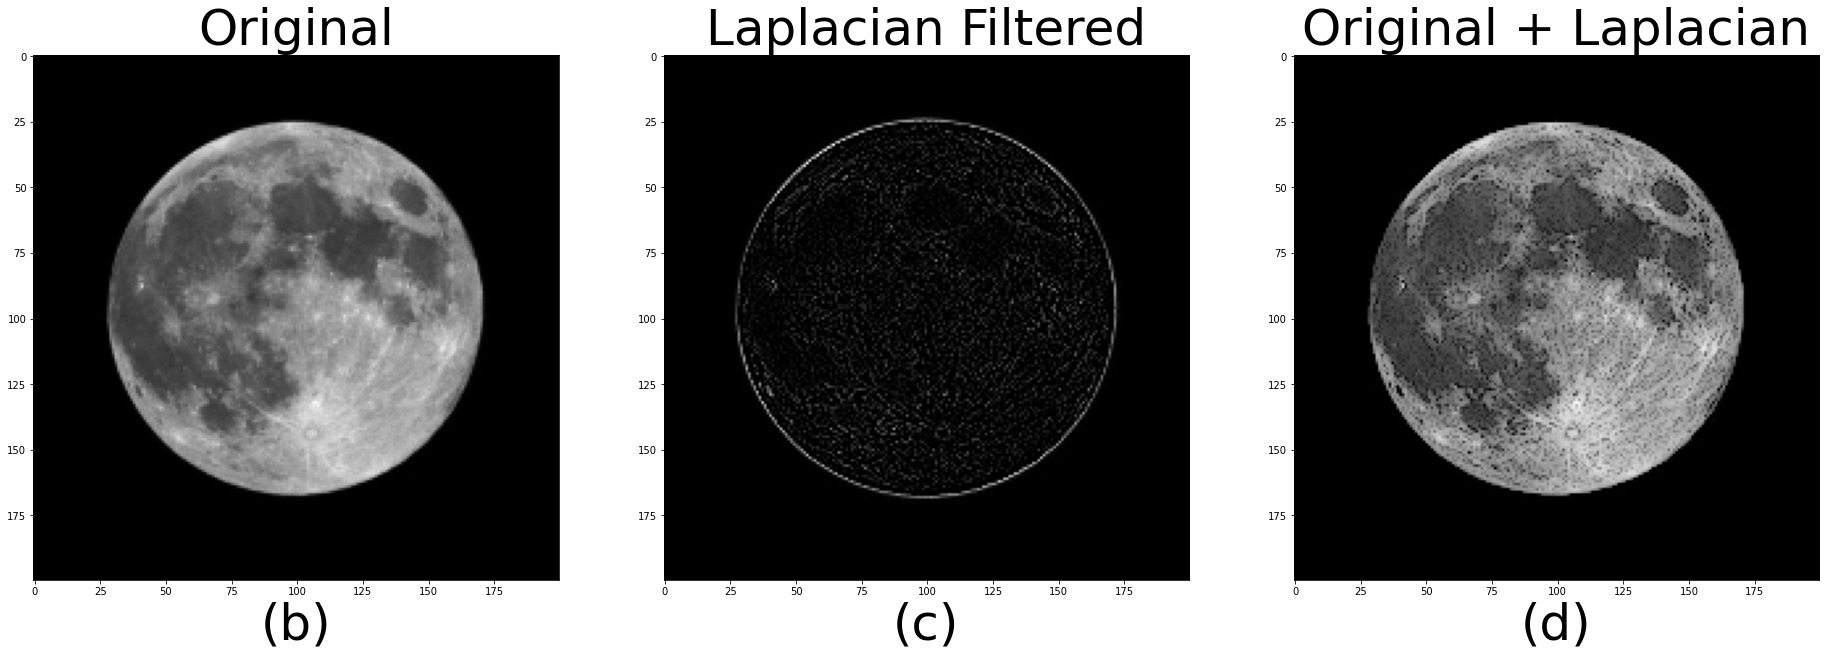

In [40]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("drive/My Drive/Pictures/Mond.jpg", 0)
img = cv2.resize(img, (200,200))
size = 50

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original", fontsize=size), plt.xlabel("(b)", fontsize=size)

kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
mean_filterd = cv2.filter2D(img, -1, kernel)
plt.subplot(132), plt.imshow(mean_filterd, "gray"), plt.title("Laplacian Filtered", fontsize=size), plt.xlabel("(c)", fontsize=size)
summed = img - mean_filterd
print(img.max())
for i in range(200):
  for j in range(200):
    if img[i,j] < mean_filterd[i,j]:
      summed[i,j] = 0
print(summed.max(), summed.min())
plt.subplot(133), plt.imshow(summed, "gray"), plt.title("Original + Laplacian", fontsize=size), plt.xlabel("(d)", fontsize=size)
plt.savefig("drive/My Drive/Pictures/lap_filter.jpg")

In [0]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

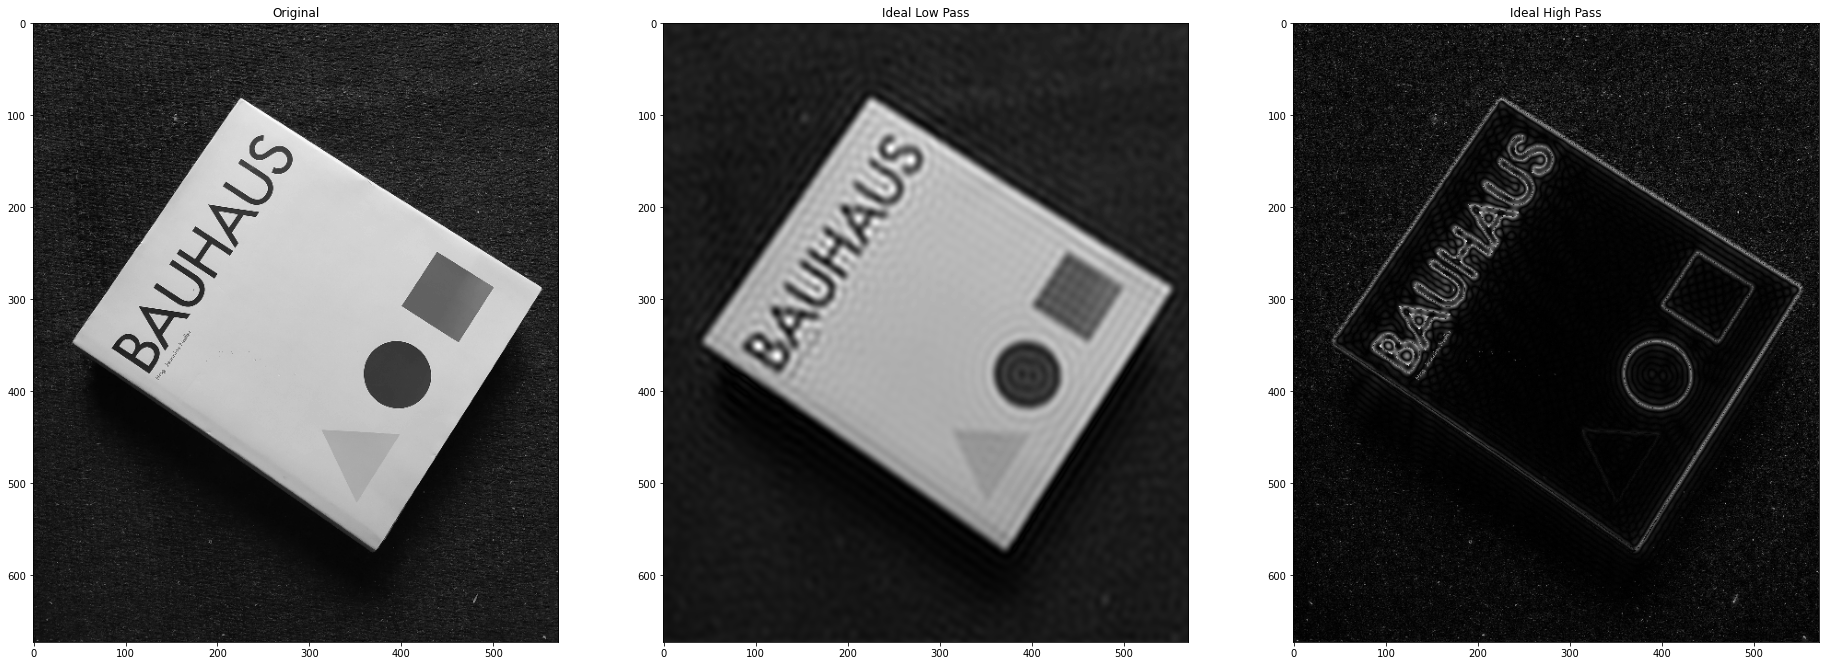

In [0]:
img = cv2.imread("drive/My Drive/Pictures/bauhaus.jpg", 0)
img = cv2.resize(img, (int(img.shape[1]/5), int(img.shape[0]/5)))
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original")

#plt.show()

plt.savefig('drive/My Drive/Pictures/original_LP_HP.png')

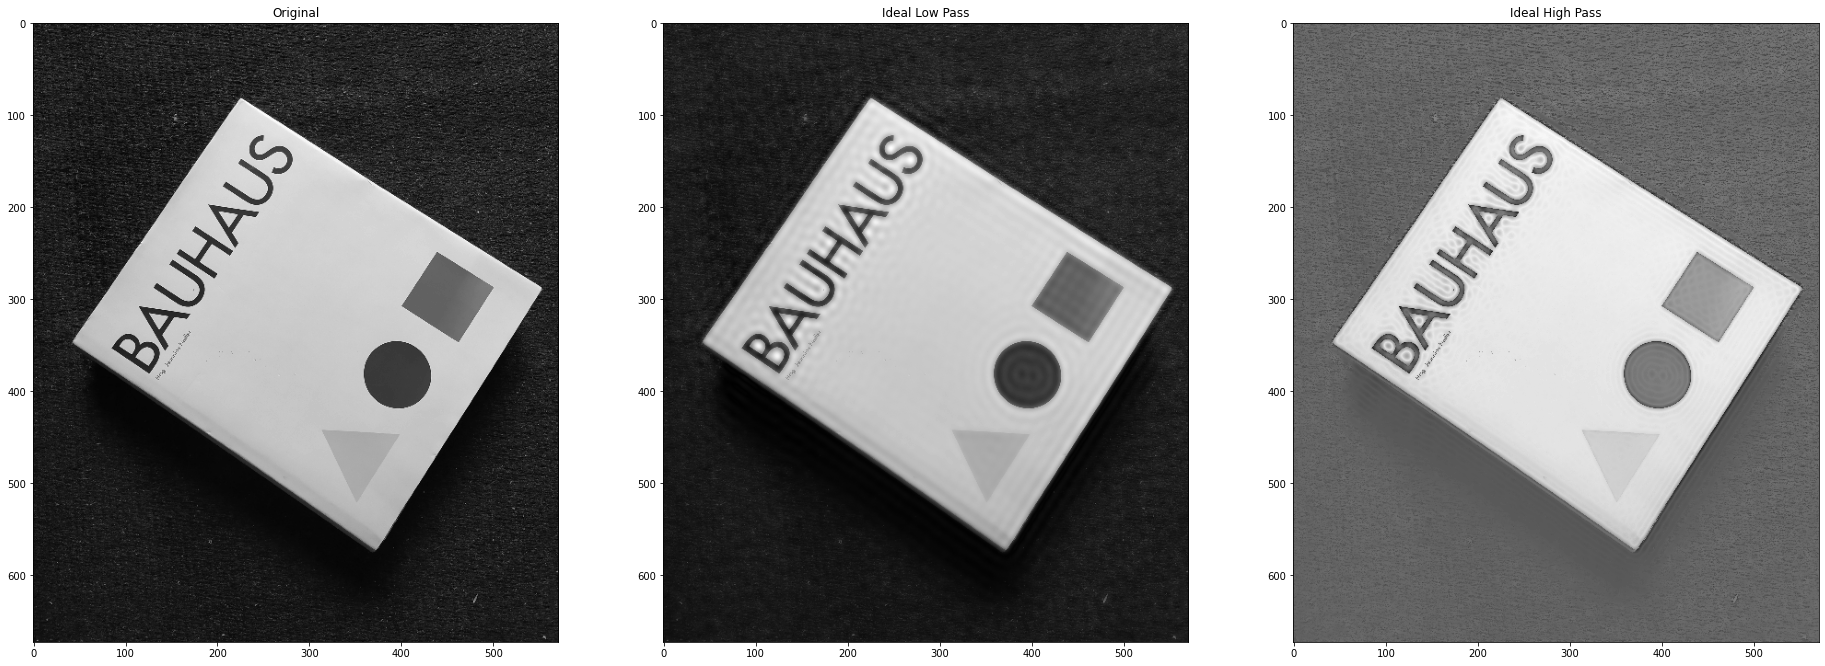

In [0]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LPImage = img + np.abs(inverse_LowPass)
plt.subplot(132), plt.imshow(LPImage, "gray"), plt.title("Ideal Low Pass")

HPImage = img - np.abs(inverse_HighPass)
plt.subplot(133), plt.imshow(HPImage, "gray"), plt.title("Ideal High Pass")

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original")

plt.show()

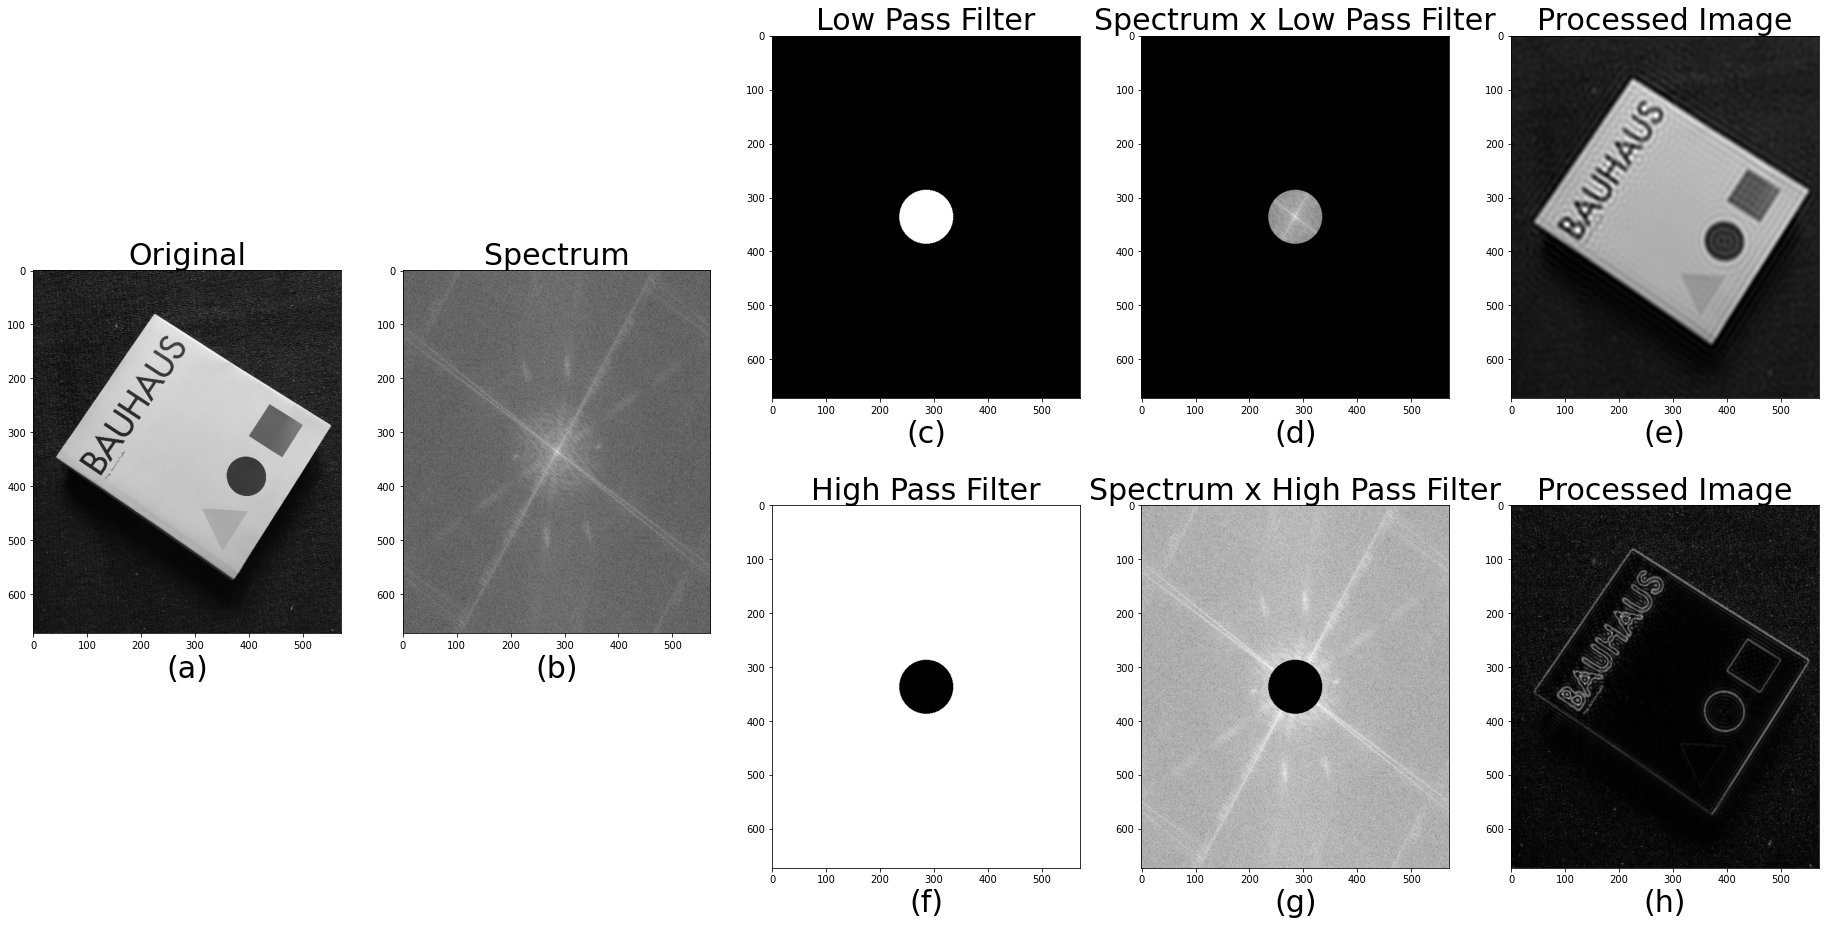

In [0]:
plt.figure(figsize=(6.4*5, 4.8*3), constrained_layout=False)

size = 30

plt.subplots_adjust(bottom=0.05)

plt.subplot(1,5,1), plt.imshow(img, "gray"), plt.title("Original", fontsize=size), plt.xlabel("(a)", fontsize=size)

plt.subplot(1,5,2), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum", fontsize=size), plt.xlabel("(b)", fontsize=size)

HighPass = idealFilterHP(50,img.shape)
plt.subplot(2,5,8), plt.imshow(np.abs(HighPass), "gray"), plt.title("Highpass Filter", fontsize=size), plt.xlabel("(f)", fontsize=size)

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(2,5,9), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Spectrum x Highpass Filter", fontsize=size), plt.xlabel("(g)", fontsize=size)

HighPass = np.fft.ifftshift(HighPassCenter)

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(2,5,10), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image", fontsize=size), plt.xlabel("(h)", fontsize=size)

LowPass = idealFilterLP(50,img.shape)
plt.subplot(2,5,3), plt.imshow(np.abs(LowPass), "gray"), plt.title("Lowpass Filter", fontsize=size), plt.xlabel("(c)", fontsize=size)

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(2,5,4), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Spectrum x Lowpass Filter", fontsize=size), plt.xlabel("(d)", fontsize=size)

LowPass = np.fft.ifftshift(LowPassCenter)

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(2,5,5), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image", fontsize=size), plt.xlabel("(e)", fontsize=size)

#plt.show()
plt.savefig("drive/My Drive/Pictures/high_pass.png")

In [0]:
img.shape

(673, 571)

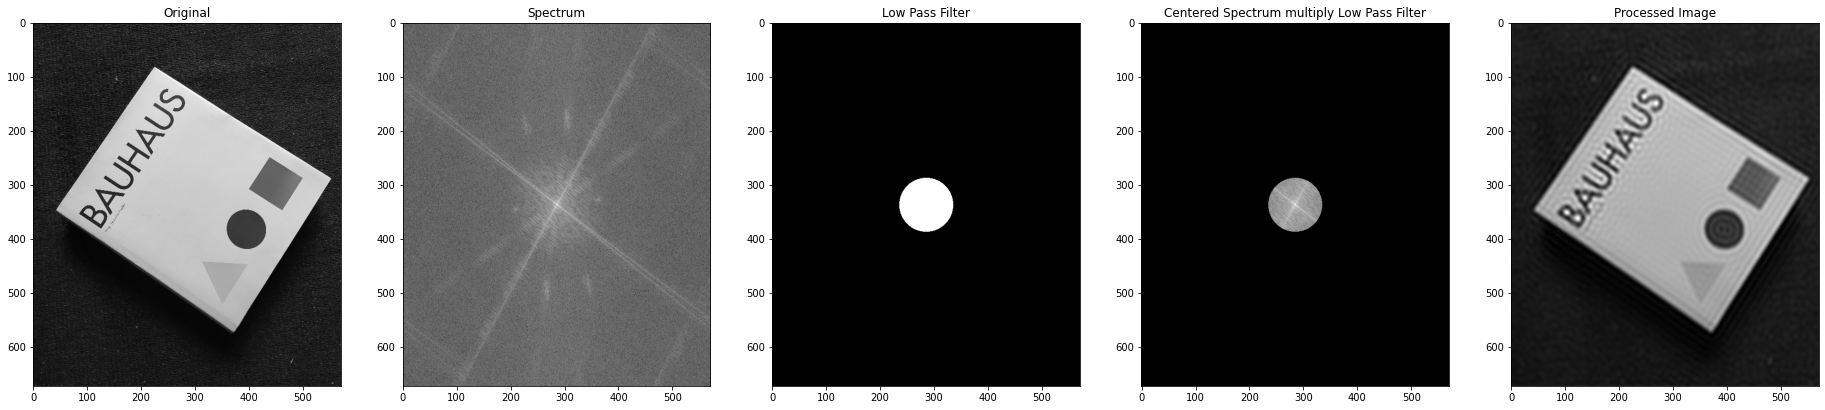

In [0]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original")

plt.subplot(152), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

#plt.show()
plt.savefig("drive/My Drive/Pictures/low_pass.png")